# This notebook demonstrates the Flow Matching process interactively.

In [1]:
!pwd

/home/skr/Downloads/flow-matching/src


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to the path so we can import from src
# In Jupyter notebooks, we need to get the current working directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# Change to the parent directory so images are saved in the right place
os.chdir(parent_dir)

from src.flow_matching import FlowMatching
from src.utils import generate_dynamic_conditioning
from src.visualization import visualize_flow_matching

# Initialize model and data
model = FlowMatching()
target_data = model.generate_two_circles_targets()

# Visualize the initial vector field
visualize_flow_matching(model, target_data, step=0)

In [4]:
# Train the model for a few steps and visualize progress
from tqdm import tqdm

# Training loop
n_steps = 500
for step in tqdm(range(n_steps)):
    # Simulate dynamic conditioning that changes over time
    conditioning_info = generate_dynamic_conditioning(step, n_steps)
    loss = model.train_step(target_data, conditioning_info)
    
    if (step + 1) % 100 == 0:
        print(f"Step {step + 1}, Loss: {loss:.4f}")
        visualize_flow_matching(model, target_data, step + 1)

 49%|████▉     | 246/500 [00:00<00:00, 802.63it/s]

Step 100, Loss: 2.5866
Step 200, Loss: 2.0536
Step 300, Loss: 2.2645


100%|██████████| 500/500 [00:00<00:00, 798.64it/s]

Step 400, Loss: 2.2927
Step 500, Loss: 2.3778


Animation saved as 'images/flow_matching_demo.gif'


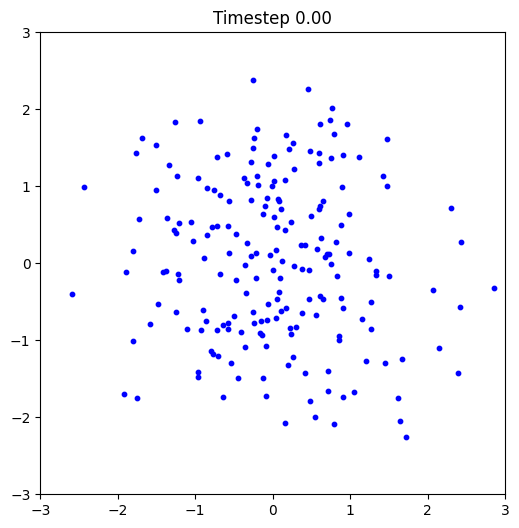

In [5]:
# Create an animation showing the flow
from src.visualization import visualize_flow

# Generate animation
ani = visualize_flow(model, target_data, generate_dynamic_conditioning(n_steps - 1, n_steps))
ani.save('images/flow_matching_demo.gif', writer='pillow')
print("Animation saved as 'images/flow_matching_demo.gif'")
